# Requesting Argo data from Ifremer erddap, expert mode

Using the expert mode, you can have access to all fields retrieved from the erddap, including all QC variables and without any data mode filtering.

***
Script prepared by [Guillaume Maze](http://github.com/gmaze) (Mar. 2020)

In [1]:
import sys, os
import numpy as np
import xarray as xr

try:
    import argopy
except ModuleNotFoundError:
    !pip install git+http://github.com/euroargodev/argopy.git@master
    import argopy
print("argopy:", argopy.__version__)
from argopy import DataFetcher as ArgoDataFetcher

#
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import cmocean
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

# Usefull colormaps and colorbar makers:
qcmap = mpl.colors.ListedColormap(['#000000', 
                                   '#31FC03', 
                                   '#ADFC03', 
                                   '#FCBA03', 
                                   '#FC1C03',
                                   '#324CA8', 
                                   '#000000', 
                                   '#000000', 
                                   '#B22CC9', 
                                   '#000000'])
def colorbar_qc(cmap, **kwargs):
    """Adjust colorbar ticks with discrete colors for QC flags"""
    ncolors = 10
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    return colorbar

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['A','D','R'])

dmode_map = mpl.colors.ListedColormap(['#FCBA03','#31FC03','#FF0000'])
def colorbar_dmode(cmap=dmode_map, **kwargs):
    """Adjust colorbar ticks with discrete colors for DATA MODE"""
    ncolors = 3
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(le.classes_)
    return colorbar

argopy: 0.1.1


# Create the Argo data loader instance

If we want to retrieve data without post-processing, we need to specify the ``mode`` option to ``expert`` when creating the data loader instance.

In [2]:
argo_loader = ArgoDataFetcher(mode='expert')
# argo_loader = ArgoDataFetcher(mode='expert', cachedir='tmp')
argo_loader

<datafetcher 'Not initialised'>
Backend: erddap
Fetchers: profile, float, region
User mode: expert

# Example of data fetching for a specific region

In [3]:
box = [-80., 0., 26-0.5, 26+.5, 0, 1000, '2018-01-01','2018-12-31']
ds = argo_loader.region(box).to_xarray()
ds

<xarray.Dataset>
Dimensions:              (N_POINTS: 84912)
Coordinates:
    TIME                 (N_POINTS) datetime64[ns] 2018-01-01T20:16:00 ... 2018-12-30T15:47:00
    LATITUDE             (N_POINTS) float64 26.08 26.08 26.08 ... 25.72 25.72
  * N_POINTS             (N_POINTS) int64 0 1 2 3 4 ... 84908 84909 84910 84911
    LONGITUDE            (N_POINTS) float64 -15.47 -15.47 -15.47 ... -63.1 -63.1
Data variables:
    CYCLE_NUMBER         (N_POINTS) int64 97 97 97 97 97 ... 236 236 236 236 236
    DATA_MODE            (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION            (N_POINTS) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER      (N_POINTS) int64 6901620 6901620 ... 6901183 6901183
    POSITION_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES                 (N_POINTS) float64 6.0 7.0 8.0 ... 975.2 985.1 993.2
    PRES_ADJUSTED        (N_POINTS) float64 6.0 7.0 8.0 ... 975.2 985.1 993.2
    PRES_ADJUSTED_ERROR  (N_POINTS) float64 2.4 2.4 2.4 2.4 ... 5.0 5.0 5.0 5.0
    PRES_ADJUSTED_QC     (N_POINTS) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES_QC              (N_POINTS) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PSAL                 (N_POINTS) float64 36.81 36.81 36.81 ... 35.08 35.08
    PSAL_ADJUSTED        (N_POINTS) float64 36.81 36.81 36.81 ... 35.08 35.08
    PSAL_ADJUSTED_ERROR  (N_POINTS) float64 0.01 0.01 0.01 ... 0.01 0.01 0.01
    PSAL_ADJUSTED_QC     (N_POINTS) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PSAL_QC              (N_POINTS) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP                 (N_POINTS) float64 19.76 19.76 19.76 ... 6.888 6.792
    TEMP_ADJUSTED        (N_POINTS) float64 19.76 19.76 19.76 ... 6.888 6.792
    TEMP_ADJUSTED_ERROR  (N_POINTS) float64 0.002 0.002 0.002 ... 0.01 0.01 0.01
    TEMP_ADJUSTED_QC     (N_POINTS) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP_QC              (N_POINTS) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC              (N_POINTS) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         http://www.ifremer.fr/erddap
    Fetched_by:           gmaze
    Fetched_date:         2020/04/06
    Fetched_constraints:  phy_[x=-80.00/0.00; y=25.50/26.50; z=0.0/1000.0; t=...
    Fetched_url:          http://www.ifremer.fr/erddap/tabledap/ArgoFloats.cs...

## QC figure with unfiltered data

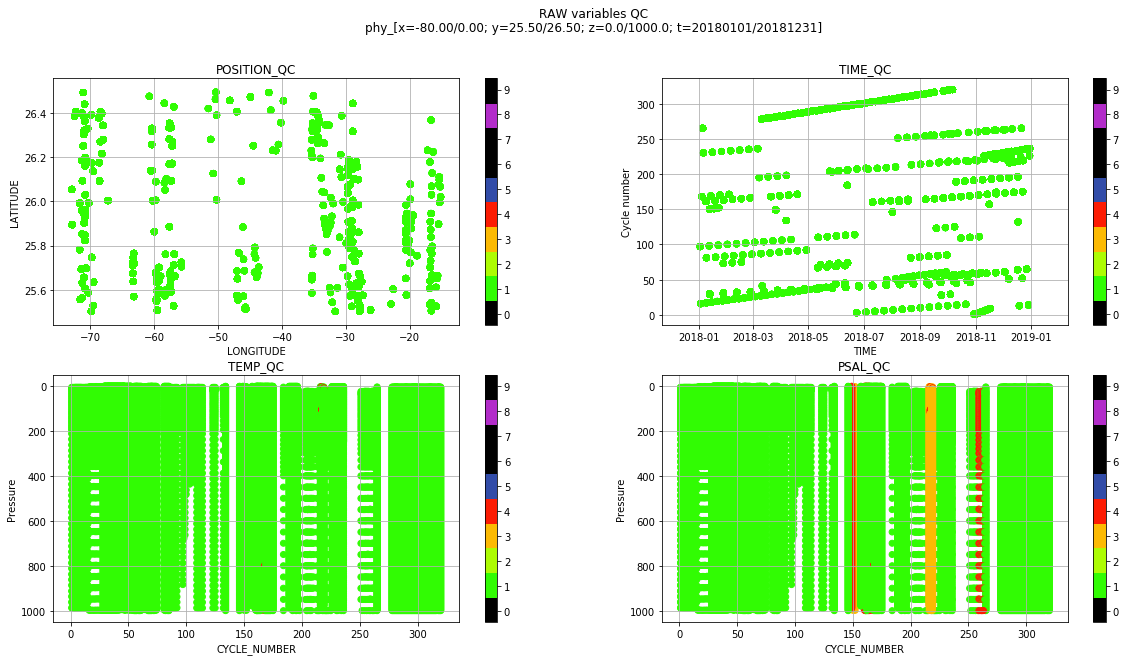

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(ds['LONGITUDE'], ds['LATITUDE'], c=ds['POSITION_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].set_xlabel('LONGITUDE')
ax[ix].set_ylabel('LATITUDE')
ax[ix].set_title('POSITION_QC')

ix += 1
sc = ax[ix].scatter(ds['TIME'].values, ds['CYCLE_NUMBER'], c=ds['TIME_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].set_xlabel('TIME')
ax[ix].set_ylabel('Cycle number')
ax[ix].set_title('TIME_QC')

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['TEMP_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel('CYCLE_NUMBER')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('TEMP_QC')

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['PSAL_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel('CYCLE_NUMBER')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('PSAL_QC')

fig.suptitle("RAW variables QC\n%s" % ds.attrs['Fetched_constraints']);

# Filter data according to data mode

But this is (nearly) the raw output of the request. It could be useful to simply select the most appropriate variables according to the data mode (Real TIME, adjusted and delayed mode). 

Note that this is done automatically in ``mode='standard'``.

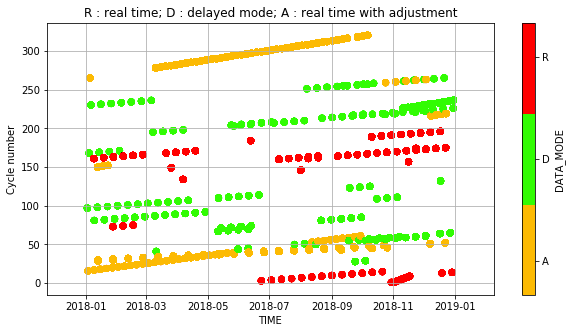

In [5]:
# Inspect data mode
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax = np.array(ax).flatten()
sc = ax[0].scatter(ds['TIME'].values, ds['CYCLE_NUMBER'], c=le.transform(ds['DATA_MODE']), 
            vmin=0, vmax=2, cmap=dmode_map)
colorbar_dmode(label='DATA_MODE', ax=ax[0])
ax[0].set_xlabel('TIME')
ax[0].set_ylabel('Cycle number')
ax[0].grid()
ax[0].set_title(ds['DATA_MODE'].attrs['convention']);

## Filter data according to data mode

In [6]:
ds_filtered = ds.argo.filter_data_mode()

## QC figure with appropriate variables

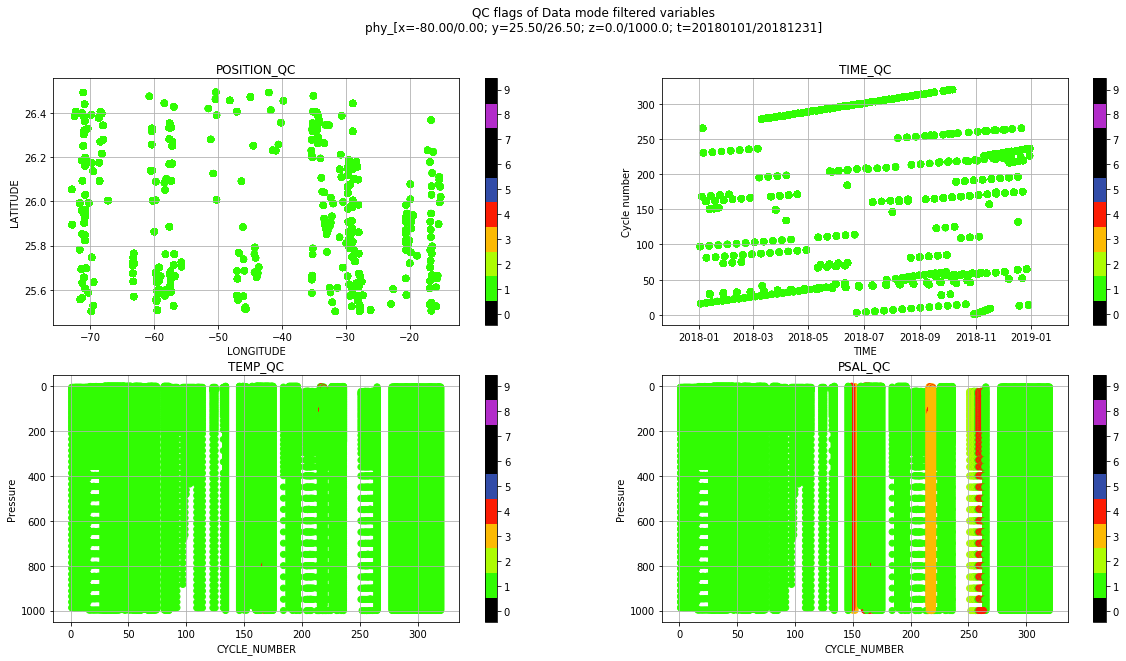

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(ds_filtered['LONGITUDE'], ds_filtered['LATITUDE'], c=ds_filtered['POSITION_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].set_xlabel('LONGITUDE')
ax[ix].set_ylabel('LATITUDE')
ax[ix].set_title('POSITION_QC')

ix += 1
sc = ax[ix].scatter(ds_filtered['TIME'].values, ds_filtered['CYCLE_NUMBER'], c=ds_filtered['TIME_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].set_xlabel('TIME')
ax[ix].set_ylabel('Cycle number')
ax[ix].set_title('TIME_QC')

ix += 1
sc = ax[ix].scatter(ds_filtered['CYCLE_NUMBER'], ds_filtered['PRES'], c=ds_filtered['TEMP_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel('CYCLE_NUMBER')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('TEMP_QC')

ix += 1
sc = ax[ix].scatter(ds_filtered['CYCLE_NUMBER'], ds_filtered['PRES'], c=ds_filtered['PSAL_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel('CYCLE_NUMBER')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('PSAL_QC')

fig.suptitle("QC flags of Data mode filtered variables\n%s" % ds_filtered.attrs['Fetched_constraints']);

# Example of data fetching for a specific float

In [8]:
float_fetcher = argo_loader.float(6902746)
# float_fetcher = argo_loader.float(2903005) # Float with a RBRargo sensor

ds_unfiltered = float_fetcher.to_xarray()
ds = ds_unfiltered.argo.filter_data_mode()
ds

<xarray.Dataset>
Dimensions:          (N_POINTS: 13368)
Coordinates:
    TIME             (N_POINTS) datetime64[ns] 2017-07-06T14:49:00 ... 2020-03-29T07:22:00
  * N_POINTS         (N_POINTS) int64 0 1 2 3 4 ... 13364 13365 13366 13367
    LATITUDE         (N_POINTS) float64 20.08 20.08 20.08 ... 21.6 21.6 21.6
    LONGITUDE        (N_POINTS) float64 -60.17 -60.17 -60.17 ... -84.01 -84.01
Data variables:
    CYCLE_NUMBER     (N_POINTS) int64 1 1 1 1 1 1 1 ... 125 125 125 125 125 125
    DATA_MODE        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'R' 'R' 'R' 'R' 'R'
    DIRECTION        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int64 6902746 6902746 ... 6902746 6902746
    POSITION_QC      (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float64 9.0 14.0 24.0 ... 2.013e+03 2.032e+03
    PRES_ERROR       (N_POINTS) float64 2.4 2.4 2.4 2.4 2.4 ... nan nan nan nan
    PRES_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PSAL             (N_POINTS) float64 36.06 36.06 36.06 ... 35.03 35.03 35.03
    PSAL_ERROR       (N_POINTS) float64 0.01235 0.01236 0.01235 ... nan nan nan
    PSAL_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 4 4 4 4 4 4 4 4 4
    TEMP             (N_POINTS) float64 28.04 28.03 28.02 ... 4.263 4.26 4.258
    TEMP_ERROR       (N_POINTS) float64 0.002 0.002 0.002 0.002 ... nan nan nan
    TEMP_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         http://www.ifremer.fr/erddap
    Fetched_by:           gmaze
    Fetched_date:         2020/04/06
    Fetched_constraints:  phy_WMO6902746
    Fetched_url:          http://www.ifremer.fr/erddap/tabledap/ArgoFloats.cs...
    history:              Variables filtered according to DATA_MODE

In [9]:
# Get basic information about the float:
print('This float has performed: %i profiles' % len(np.unique(ds['CYCLE_NUMBER'])))
print('This float operated between %s and %s' % (ds['TIME'].min().values, ds['TIME'].max().values))
print('This float profiles range from %0.1fdb to %0.1fdb' % (ds['PRES'].min(), ds['PRES'].max() ))

This float has performed: 125 profiles
This float operated between 2017-07-06T14:49:00.000000000 and 2020-03-29T07:22:00.000000000
This float profiles range from 3.0db to 2037.0db


## Plot trajectory

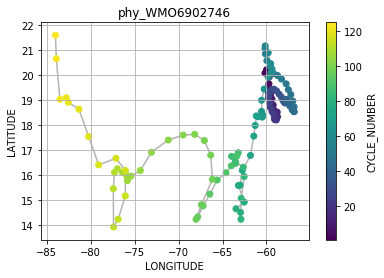

In [10]:
this = ds.reset_coords().groupby('CYCLE_NUMBER').min()
plt.plot(this['LONGITUDE'], this['LATITUDE'], '-', color=[0.7]*3, zorder=0)
plt.scatter(this['LONGITUDE'], this['LATITUDE'], c=this['CYCLE_NUMBER'])
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.gca().grid()
plt.colorbar(label='CYCLE_NUMBER')
plt.title(ds.attrs['Fetched_constraints'])
plt.show()

## QC flags for appropriate variables

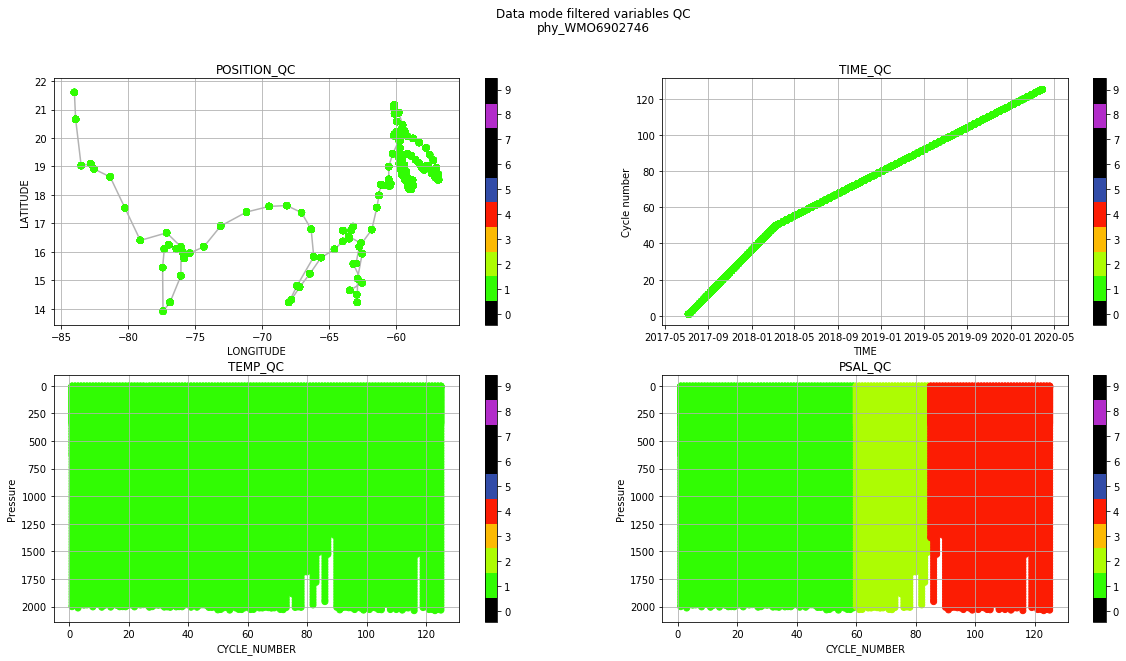

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = np.array(ax).flatten()

ix = 0
ax[ix].plot(ds['LONGITUDE'], ds['LATITUDE'], '-', color=[0.7]*3, zorder=0)
sc = ax[ix].scatter(ds['LONGITUDE'], ds['LATITUDE'], c=ds['POSITION_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].set_xlabel('LONGITUDE')
ax[ix].set_ylabel('LATITUDE')
ax[ix].set_title('POSITION_QC')

ix += 1
sc = ax[ix].scatter(ds['TIME'].values, ds['CYCLE_NUMBER'], c=ds['TIME_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].set_xlabel('TIME')
ax[ix].set_ylabel('Cycle number')
ax[ix].set_title('TIME_QC')

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['TEMP_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel('CYCLE_NUMBER')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('TEMP_QC')

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['PSAL_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel('CYCLE_NUMBER')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('PSAL_QC')

fig.suptitle("Data mode filtered variables QC\n%s" % ds.attrs['Fetched_constraints']);

## DATA MODE

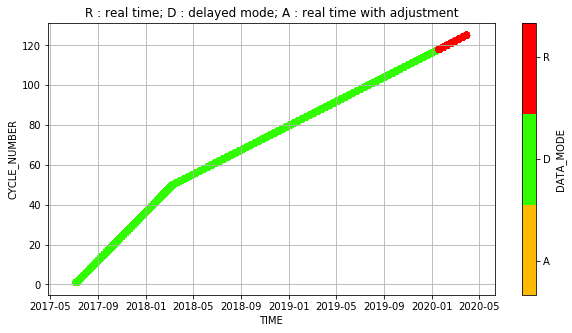

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax = np.array(ax).flatten()
sc = ax[0].scatter(ds['TIME'].values, ds['CYCLE_NUMBER'], c=le.transform(ds['DATA_MODE']), 
            vmin=0, vmax=2, cmap=dmode_map)
colorbar_dmode(label='DATA_MODE', ax=ax[0])
ax[0].set_ylabel('CYCLE_NUMBER')
ax[0].set_xlabel('TIME')
ax[0].grid()
ax[0].set_title(ds['DATA_MODE'].attrs['convention']);

## Hovmoller

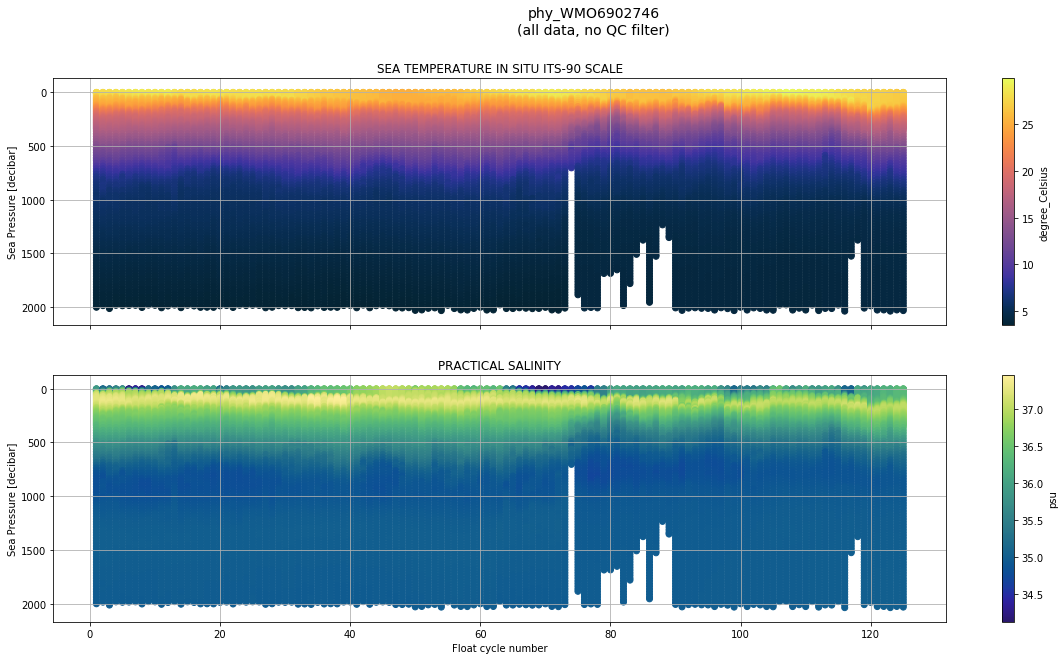

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,10), sharex=True, sharey=True)
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['TEMP'], cmap=cmocean.cm.thermal)
plt.colorbar(sc, ax=ax[ix], label=ds['TEMP'].attrs['units'])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['TEMP'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['PSAL'], cmap=cmocean.cm.haline)
plt.colorbar(sc, ax=ax[ix], label=ds['PSAL'].attrs['units'])
ax[ix].grid()
# ax[ix].invert_yaxis()
ax[ix].set_xlabel(ds['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['PSAL'].attrs['long_name']);

fig.suptitle("%s\n(all data, no QC filter)" % ds.attrs['Fetched_constraints'], fontsize=14);

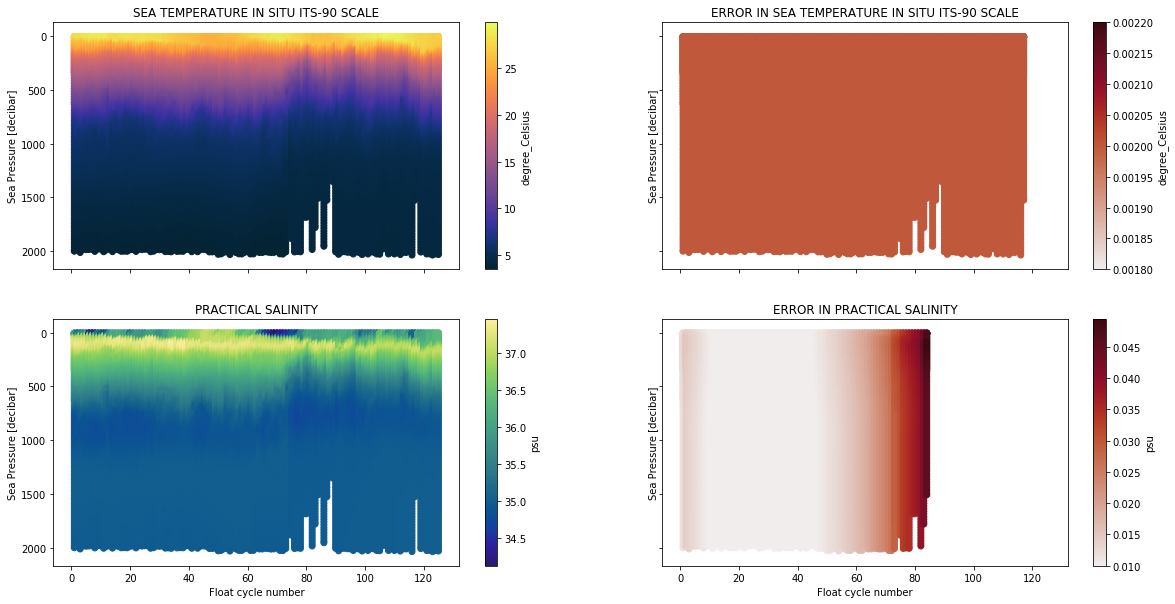

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10), sharex=True, sharey=True)
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['TEMP'], cmap=cmocean.cm.thermal)
plt.colorbar(sc, ax=ax[ix], label=ds['TEMP'].attrs['units'])
ax[ix].invert_yaxis()
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['TEMP'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['TEMP_ERROR'], cmap=cmocean.cm.amp)
plt.colorbar(sc, ax=ax[ix], label=ds['TEMP_ERROR'].attrs['units'])
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['TEMP_ERROR'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['PSAL'], cmap=cmocean.cm.haline)
plt.colorbar(sc, ax=ax[ix], label=ds['PSAL'].attrs['units'])
ax[ix].set_xlabel(ds['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['PSAL'].attrs['long_name']);

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['PSAL_ERROR'], cmap=cmocean.cm.amp)
plt.colorbar(sc, ax=ax[ix], label=ds['PSAL_ERROR'].attrs['units'])
ax[ix].set_xlabel(ds['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['PSAL_ERROR'].attrs['long_name']);

## Super-imposed profiles

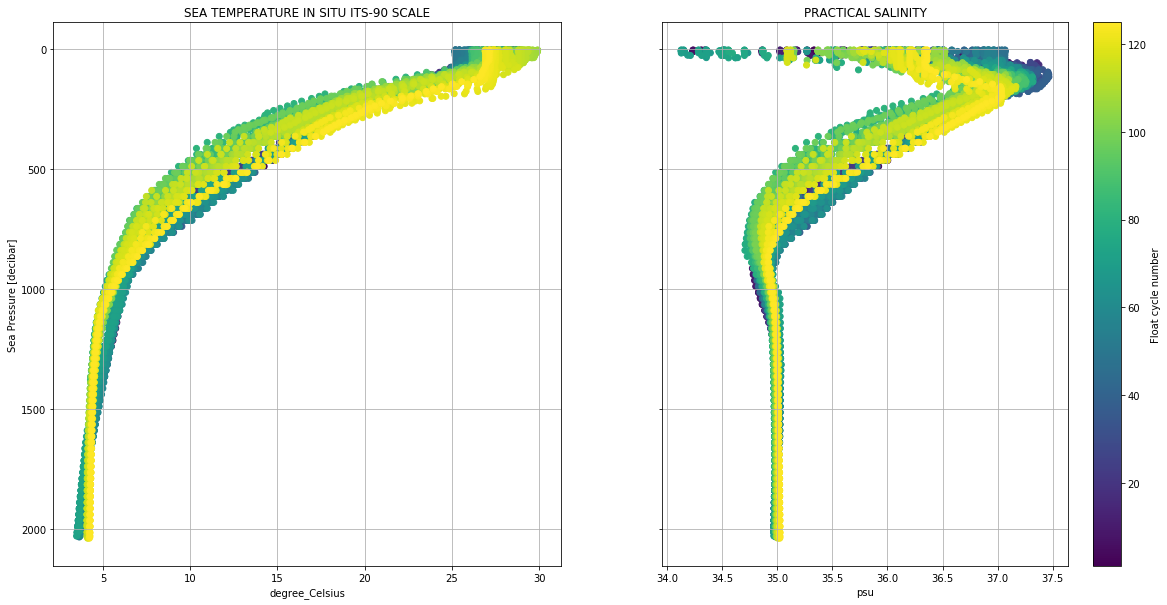

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(ds['TEMP'], ds['PRES'], c=ds['CYCLE_NUMBER'])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel(ds['TEMP'].attrs['units'])
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['TEMP'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(ds['PSAL'], ds['PRES'], c=ds['CYCLE_NUMBER'])
plt.colorbar(sc, ax=ax[ix], label=ds['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].grid()
ax[ix].set_xlabel(ds['PSAL'].attrs['units'])
ax[ix].set_title(ds['PSAL'].attrs['long_name']);


## T/S diagram

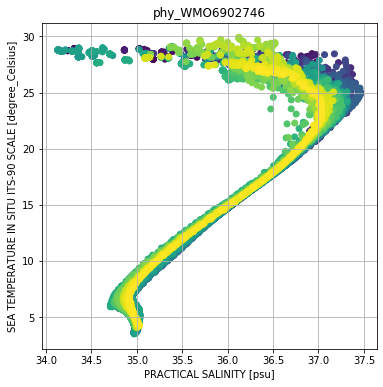

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax = np.array(ax).flatten()
ix = 0
sc = ax[ix].scatter(ds['PSAL'], ds['TEMP'], c=ds['CYCLE_NUMBER'])
ax[ix].grid()
ax[ix].set_xlabel("%s [%s]" % (ds['PSAL'].attrs['long_name'], ds['PSAL'].attrs['units']))
ax[ix].set_ylabel("%s [%s]" % (ds['TEMP'].attrs['long_name'], ds['TEMP'].attrs['units']))
plt.title(ds.attrs['Fetched_constraints']);

# Filter data according to QC flags

In [17]:
ds_ok = ds.argo.filter_qc()

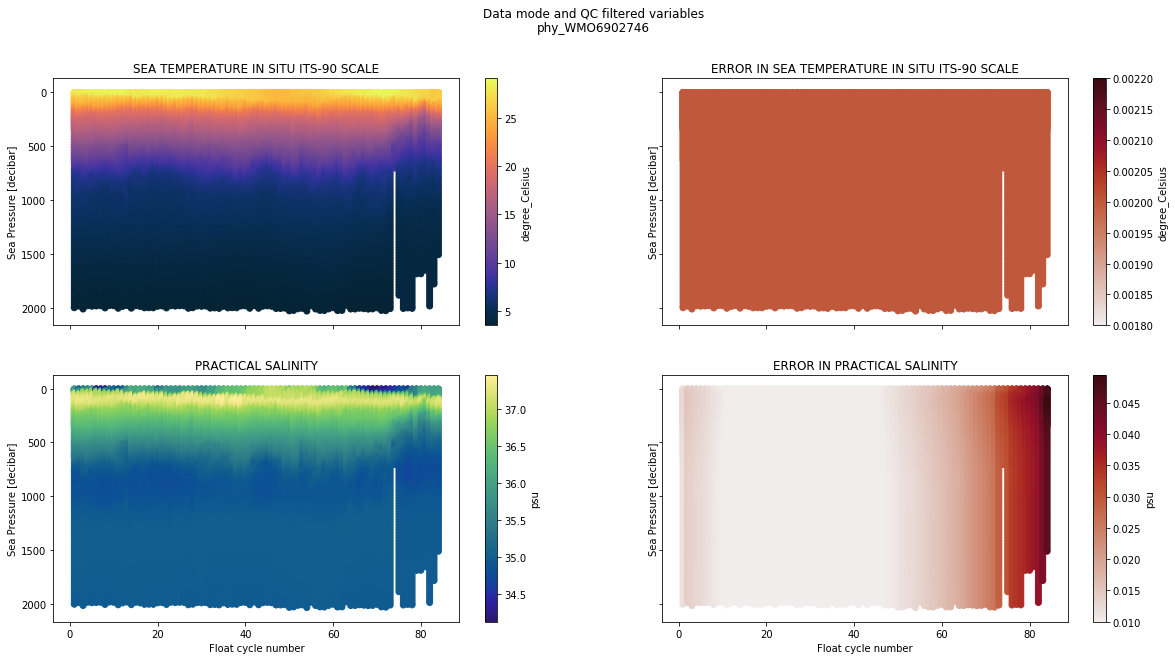

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10), sharex=True, sharey=True)
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(ds_ok['CYCLE_NUMBER'], ds_ok['PRES'], c=ds_ok['TEMP'], cmap=cmocean.cm.thermal)
plt.colorbar(sc, ax=ax[ix], label=ds_ok['TEMP'].attrs['units'])
ax[ix].invert_yaxis()
ax[ix].set_ylabel("%s [%s]" % (ds_ok['PRES'].attrs['long_name'], ds_ok['PRES'].attrs['units']))
ax[ix].set_title(ds_ok['TEMP'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(ds_ok['CYCLE_NUMBER'], ds_ok['PRES'], c=ds_ok['TEMP_ERROR'], cmap=cmocean.cm.amp)
plt.colorbar(sc, ax=ax[ix], label=ds_ok['TEMP_ERROR'].attrs['units'])
ax[ix].set_ylabel("%s [%s]" % (ds_ok['PRES'].attrs['long_name'], ds_ok['PRES'].attrs['units']))
ax[ix].set_title(ds_ok['TEMP_ERROR'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(ds_ok['CYCLE_NUMBER'], ds_ok['PRES'], c=ds_ok['PSAL'], cmap=cmocean.cm.haline)
plt.colorbar(sc, ax=ax[ix], label=ds_ok['PSAL'].attrs['units'])
ax[ix].set_xlabel(ds_ok['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].set_ylabel("%s [%s]" % (ds_ok['PRES'].attrs['long_name'], ds_ok['PRES'].attrs['units']))
ax[ix].set_title(ds_ok['PSAL'].attrs['long_name']);

ix += 1
sc = ax[ix].scatter(ds_ok['CYCLE_NUMBER'], ds_ok['PRES'], c=ds_ok['PSAL_ERROR'], cmap=cmocean.cm.amp)
plt.colorbar(sc, ax=ax[ix], label=ds_ok['PSAL_ERROR'].attrs['units'])
ax[ix].set_xlabel(ds_ok['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].set_ylabel("%s [%s]" % (ds_ok['PRES'].attrs['long_name'], ds_ok['PRES'].attrs['units']))
ax[ix].set_title(ds_ok['PSAL_ERROR'].attrs['long_name']);

fig.suptitle("Data mode and QC filtered variables\n%s" % ds_ok.attrs['Fetched_constraints']);

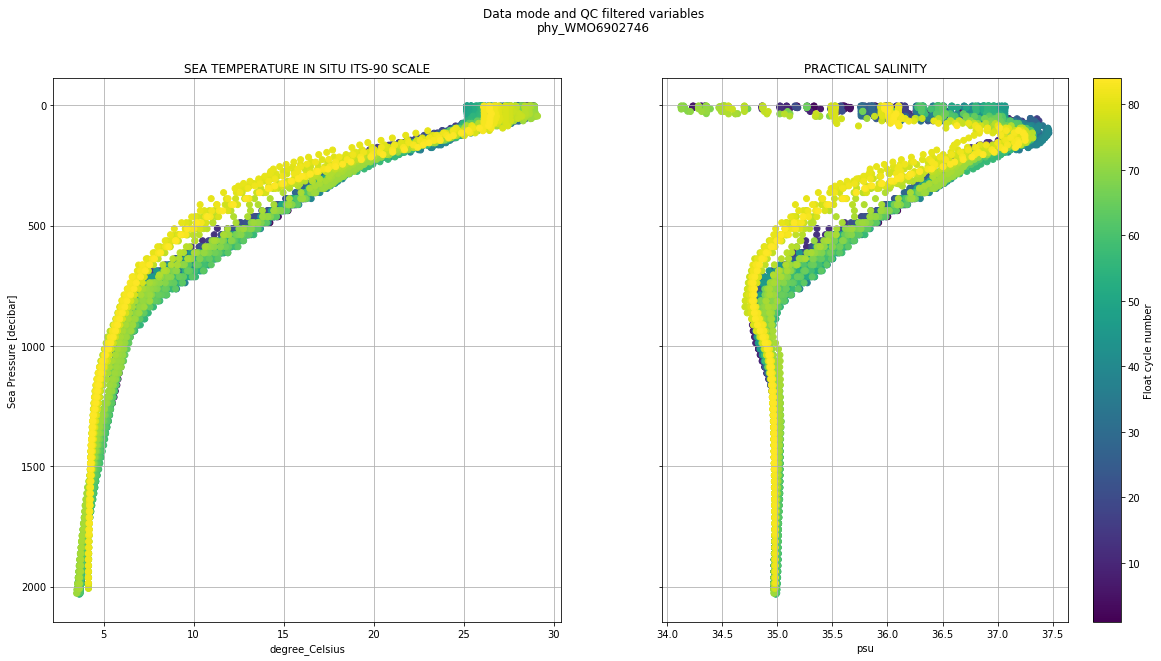

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(ds_ok['TEMP'], ds_ok['PRES'], c=ds_ok['CYCLE_NUMBER'])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel(ds_ok['TEMP'].attrs['units'])
ax[ix].set_ylabel("%s [%s]" % (ds_ok['PRES'].attrs['long_name'], ds_ok['PRES'].attrs['units']))
ax[ix].set_title(ds_ok['TEMP'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(ds_ok['PSAL'], ds_ok['PRES'], c=ds_ok['CYCLE_NUMBER'])
plt.colorbar(sc, ax=ax[ix], label=ds_ok['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].grid()
ax[ix].set_xlabel(ds_ok['PSAL'].attrs['units'])
ax[ix].set_title(ds_ok['PSAL'].attrs['long_name']);

fig.suptitle("Data mode and QC filtered variables\n%s" % ds_ok.attrs['Fetched_constraints']);

***
This work is part and was supported by the following projects:
<div>
<img src="https://avatars1.githubusercontent.com/u/58258213?s=460&v=4" width="70"/>
<img src="http://www.argo-france.fr/wp-content/uploads/2019/10/Argo-logo_banner-color.png" width="200"/>
<img src="https://www.umr-lops.fr/var/storage/images/_aliases/logo_main/medias-ifremer/medias-lops/logos/logo-lops-2/1459683-4-fre-FR/Logo-LOPS-2.png" width="70"/>
</div>